In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Dropout, Dense, BatchNormalization, Activation
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

In [ ]:
df = pd.read_excel("nhl odds 2021-22.xlsx")

In [ ]:
#https://towardsdatascience.com/can-we-beat-the-bookmaker-with-machine-learning-45e3b30fc921
teams = list(set(df['Home'].values)) # creating a list containing every team
n_teams = len(teams) # number of teams
teamToIdx = {t: i for i, t in enumerate(teams)} # our team vocabulary

# assigning the games' home teams their corresponding team id
homeId = [teamToIdx[id] for id in list(df['Home'].values)]
df['Home_Id'] = homeId #creating a new column for the home team id

# assigning the games' Visitors teams their corresponding team id
visitorsId = [teamToIdx[id] for id in list(df['Visitors'].values)]
df['Visitors_Id'] = visitorsId # creating a new row for the away team id

In [ ]:
df.head()

,Date,Home,Home Moneyline,Home Puckline,Home Puckline Odds,Over Under Total,Over,Under,Home Goals,Visitors,Visitors Moneyline,Visitors Puckline,Visitors Puckline Odds,Visitors Goals,Winner,Home_Id,Visitors_Id
0,20211012,TampaBay,-140,-1.5,100,6.0,100,-120,2,Pittsburgh,120,1.5,-120,6,0,0,22
1,20211012,Vegas,-290,-1.5,110,5.5,-130,110,4,SeattleKraken,235,1.5,-130,3,1,6,27
2,20211013,Washington,-135,-1.5,205,6.0,100,-120,5,NYRangers,115,1.5,-235,1,1,20,5
3,20211013,Toronto,-190,-1.5,125,5.5,100,-120,2,Montreal,160,1.5,-145,1,1,10,12
4,20211013,Edmonton,-180,-1.5,115,6.5,-120,100,3,Vancouver,150,1.5,-135,2,1,3,21


In [ ]:
X = df.drop(columns=['Winner','Date','Home','Visitors',"Home Goals", "Visitors Goals"])
Y = df['Winner']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, shuffle=False)

X_train, X_val, y_train, y_val= train_test_split(X_train, y_train, test_size=0.3, shuffle=False)

In [ ]:
model = Sequential()
model.add(Dense(2, input_shape=(X_train.shape[1], 1)))
model.add(Activation('ReLU'))
model.add(Dense(120))
model.add(BatchNormalization())
model.add(Activation('ReLU')) 
model.add(Dropout(0.5))
model.add(BatchNormalization())
model.add(Activation('ReLU'))
model.add(Dense(1, activation='sigmoid'))

# Compile the model and calculate its accuracy:
model.compile(loss='binary_crossentropy', optimizer='sgd', metrics=['accuracy']) 

# Print a summary of the Keras model:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 11, 2)             4         
                                                                 
 activation (Activation)     (None, 11, 2)             0         
                                                                 
 dense_1 (Dense)             (None, 11, 120)           360       
                                                                 
 batch_normalization (BatchN  (None, 11, 120)          480       
 ormalization)                                                   
                                                                 
 activation_1 (Activation)   (None, 11, 120)           0         
                                                                 
 dropout (Dropout)           (None, 11, 120)           0         
                                                        

In [ ]:
history = model.fit(X_train, y_train, epochs = 200, batch_size = 32, validation_data=(X_val,y_val))

Epoch 1/200
21/21 [==============================] - 2s 25ms/step - loss: 0.7983 - accuracy: 0.5205 - val_loss: 0.7452 - val_accuracy: 0.5013
Epoch 2/200
21/21 [==============================] - 0s 7ms/step - loss: 0.7737 - accuracy: 0.5118 - val_loss: 0.6948 - val_accuracy: 0.5042
Epoch 3/200
21/21 [==============================] - 0s 11ms/step - loss: 0.7611 - accuracy: 0.5209 - val_loss: 0.6961 - val_accuracy: 0.5010
Epoch 4/200
21/21 [==============================] - 0s 8ms/step - loss: 0.7606 - accuracy: 0.5087 - val_loss: 0.6981 - val_accuracy: 0.5000
Epoch 5/200
21/21 [==============================] - 0s 7ms/step - loss: 0.7499 - accuracy: 0.5238 - val_loss: 0.6980 - val_accuracy: 0.4971
Epoch 6/200
21/21 [==============================] - 0s 9ms/step - loss: 0.7566 - accuracy: 0.5146 - val_loss: 0.6964 - val_accuracy: 0.4971
Epoch 7/200
21/21 [==============================] - 0s 8ms/step - loss: 0.7607 - accuracy: 0.5104 - val_loss: 0.6980 - val_accuracy: 0.4929
Epoch 8/200

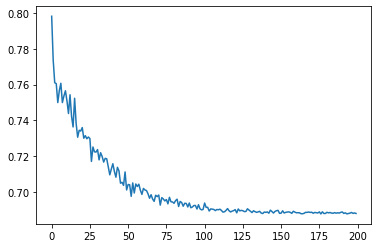

In [ ]:
plt.plot(history.history['loss'])

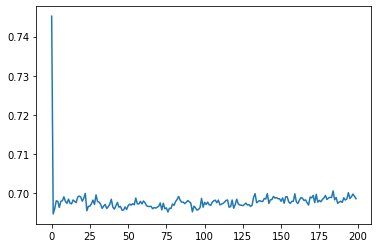

In [ ]:
plt.plot(history.history['val_loss'])

In [ ]:
prediction = model.predict(X_test)

values = []
for i in range(len(prediction[:,0])):
  if prediction[i,0] < prediction[i,1]:
    values.append(0)
  else:
    values.append(1)

In [ ]:
accuracy_score(y_test, values)

0.502127659574468